# AED sur le dataset des commandes

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `commandes`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('../RAW_data/commandesV2.csv', sep=";")
data.head()

,id_commande,date_commande,id_produit,quantité,entrepôt,statut
0,O000001,2024-09-03,P00413,2,Marseille,Livré
1,O000002,2024-11-09,P00778,15,Lyon,Expédié
2,O000004,2024-11-03,P00535,8,Lyon,Livré
3,O000006,2024-01-24,P00898,3,Paris,Livré
4,O000007,2024-02-15,P00445,1,Lyon,Livré


In [2]:
data.shape

(42404, 6)

In [3]:
data.describe()

,quantité
count,42404.000000
mean,4.788817
std,4.462332
min,1.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,20.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_commande    42404 non-null  object
 1   date_commande  42404 non-null  object
 2   id_produit     42404 non-null  object
 3   quantité       42404 non-null  int64 
 4   entrepôt       42404 non-null  object
 5   statut         42404 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

id_commande      0
date_commande    0
id_produit       0
quantité         0
entrepôt         0
statut           0
dtype: int64

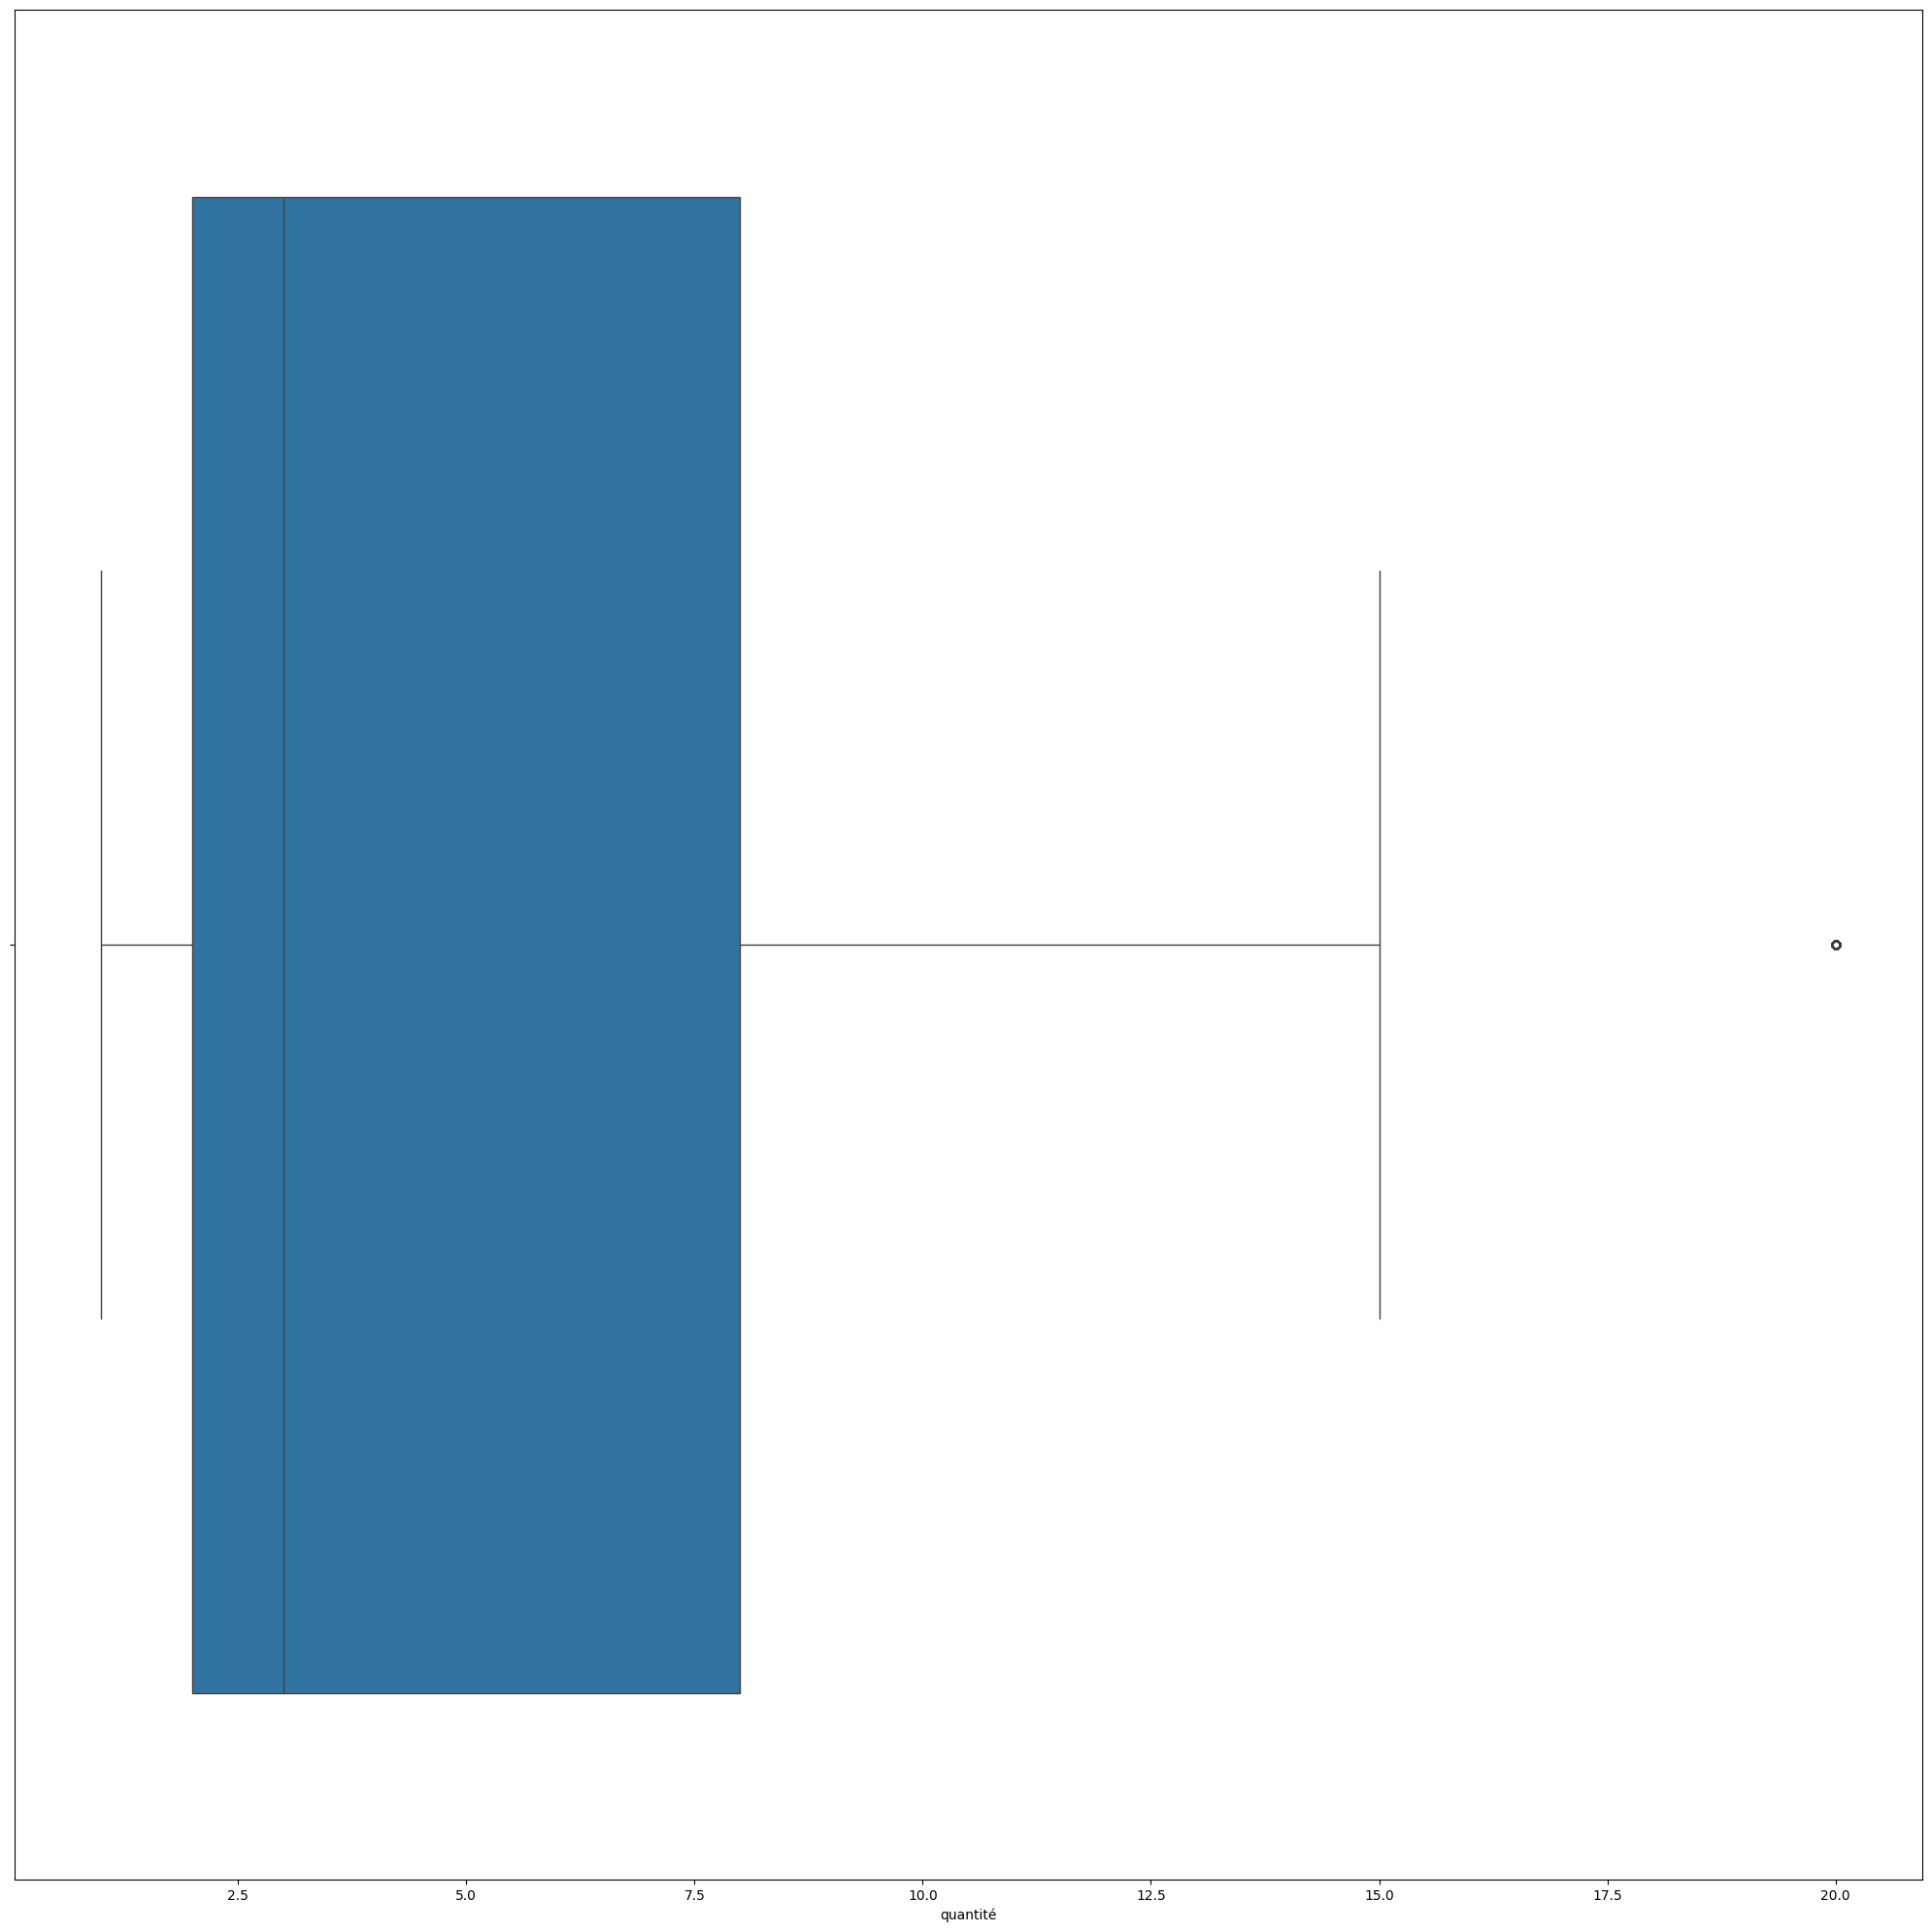

In [6]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
sns.boxplot(x=data['quantité'])
plt.tight_layout()
plt.show()

Des outliers sont présent dans la collone de quantités

## On peut constater qu'il n'y a qu'une seule collone exploitable pour l'AED, la quantité, une heat map n'est pas donc pas possible

In [11]:
print("Quantité minimum:", data['quantité'].min())
print("Quantité maximum:", data['quantité'].max())

Quantité minimum: 1
Quantité maximum: 20


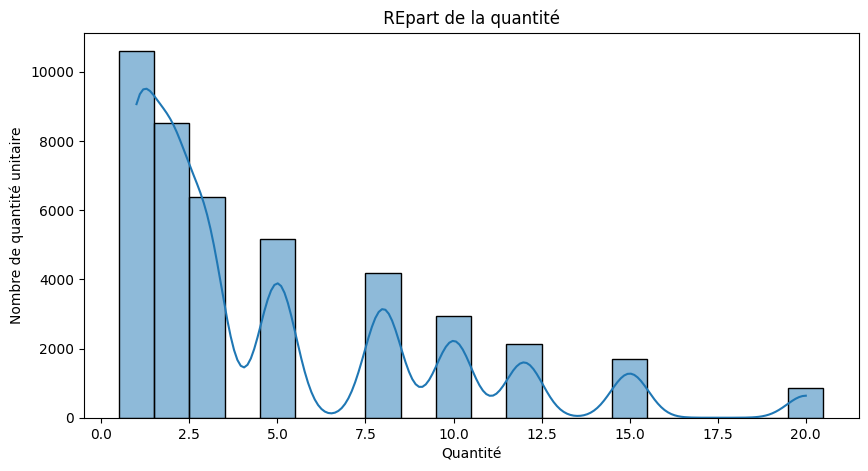

In [17]:
# Répartition des commandes par mois
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='quantité', stat='count', kde=True , discrete=True)
plt.title(' REpart de la quantité ')
plt.xlabel('Quantité')
plt.ylabel('Nombre de quantité unitaire')
plt.show()


On peut constater que la quantité de commande n'est pas linéaire, il y'a des trous dans les données.